<a href="https://colab.research.google.com/github/QingLi117/NLP/blob/main/employee_attrition_Qing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1) What problem were you trying to solve or questions were you trying to answer with this model?  
(2) Present the model and how you built it?  Where did you get the data? How did you clean it? Why did you use this method versus another method? Etc.   
(3) Give us an analysis of what your findings were and how this model answered some of the original questions and if additional work is needed.   
(4) Be ready to discuss any holes in your model or answer detailed question

1) I am trying predict employee attrition for X using logistic model, and find that employee 

In [ ]:
pip install keras-tuner


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from keras.layers import Activation, Dense, Dropout
import keras_tuner as kt           #for hypertuning!!!
from keras.utils.vis_utils import plot_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras import layers
from kerastuner import Hyperband, Objective
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
from google.colab import drive
import pickle
import statsmodels.api as sm

#**Data preprocessing**

In [ ]:
train_data = pd.read_csv('/content/train.csv')

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
train_data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


In [ ]:
train_data.iloc[[1613,1323]]

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1613,1613,25,Travel_Rarely,1151,Sales,10,1,Marketing,1,3,Female,82,3,2,Sales Executive,1,Single,10400,15067,1,Y,Yes,12,3,3,80,0,6,4,2,6,4,0,2,1
1323,1323,19,Non-Travel,268,Research & Development,20,3,Life Sciences,1,1,Male,57,1,1,Laboratory Technician,3,Single,2325,18863,1,Y,Yes,12,3,4,80,0,0,3,1,0,0,0,0,1


In [ ]:
print(train_data.shape)

(1677, 35)


In [ ]:
# we have column names like .......
features = train_data.columns.to_list()
print(features)
#feature explanation 

['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']


In [ ]:
train_data.info()
#We find that all the columns are none-null here, which means that we don't need to do imputations.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [ ]:
train_data.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,2.791890,6196.049493,14770.048301,2.574836,14.903399,3.127609,2.751342,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,1.097396,4520.050754,7112.203888,2.480215,3.420801,0.333753,1.077905,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1010.000000,636.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,2.000000,2875.000000,8509.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,3.000000,4834.000000,15332.000000,1.000000,14.000000,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,4.000000,7403.000000,20990.000000,4.000000,17.000000,3.000000,4.000000,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,4.000000,19973.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [ ]:
filtered_rows = train_data.loc[train_data['Education'] ==15,:]
print(filtered_rows)

      id  Age BusinessTravel  DailyRate              Department  \
527  527   38  Travel_Rarely        548  Research & Development   

     DistanceFromHome  Education EducationField  EmployeeCount  \
527                 1         15  Life Sciences              1   

     EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
527                        1  Female          72               3         1   

                   JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
527  Laboratory Technician                4      Divorced           2644   

     MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
527         6217                   7      Y       No                 13   

     PerformanceRating  RelationshipSatisfaction  StandardHours  \
527                  3                         1             80   

     StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
527                 1                  7                      2   

 

In [ ]:
#Let's look at the dataset imbalance
zero, pos = np.bincount(train_data['Attrition'])
total = zero + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 1677
    Positive: 200 (11.93% of total)



This shows our dataset is highly imbalanced

In [ ]:
# So we need to exclude integer data with 0 std.dev and object variable with uniqueness of 1
# First, id should be removed because it is meanmingless for the model and prediction
# Here are the three columns should be removed :EmployeeCount StandardHours Over18
# also the id data should be dropped...
train_data = train_data.drop(['EmployeeCount', 'Over18', 'StandardHours','id'], axis=1)

In [ ]:
train_data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Yes,13,3,2,1,10,2,3,10,0,7,8,0
1,35,Travel_Rarely,921,Sales,8,3,Other,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,No,17,3,4,1,4,3,3,4,2,0,3,0
2,32,Travel_Rarely,718,Sales,26,3,Marketing,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,No,17,3,4,2,4,3,3,3,2,1,2,0
3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,No,14,3,3,0,15,1,1,6,0,0,2,0
4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Yes,13,3,3,0,31,0,3,31,14,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,30,Travel_Rarely,945,Sales,1,3,Life Sciences,4,Female,73,3,3,Sales Executive,3,Single,8722,14255,1,No,19,3,2,0,10,2,4,10,0,0,8,0
1673,32,Travel_Rarely,1303,Research & Development,2,3,Life Sciences,1,Male,48,3,1,Research Scientist,2,Married,3544,15972,4,No,19,3,4,1,10,3,4,4,2,1,3,0
1674,29,Travel_Frequently,1184,Human Resources,24,3,Human Resources,2,Male,36,2,1,Human Resources,1,Married,2804,15322,1,Yes,11,3,3,0,1,2,3,1,0,0,0,1
1675,36,Travel_Rarely,441,Sales,9,2,Marketing,2,Male,48,4,2,Sales Executive,3,Divorced,5406,4051,1,No,21,4,3,2,10,3,2,10,3,0,8,0


<ipython-input-94-fdba20ac7fe4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  CorrelationMatrix = train_data.corr().round(2)


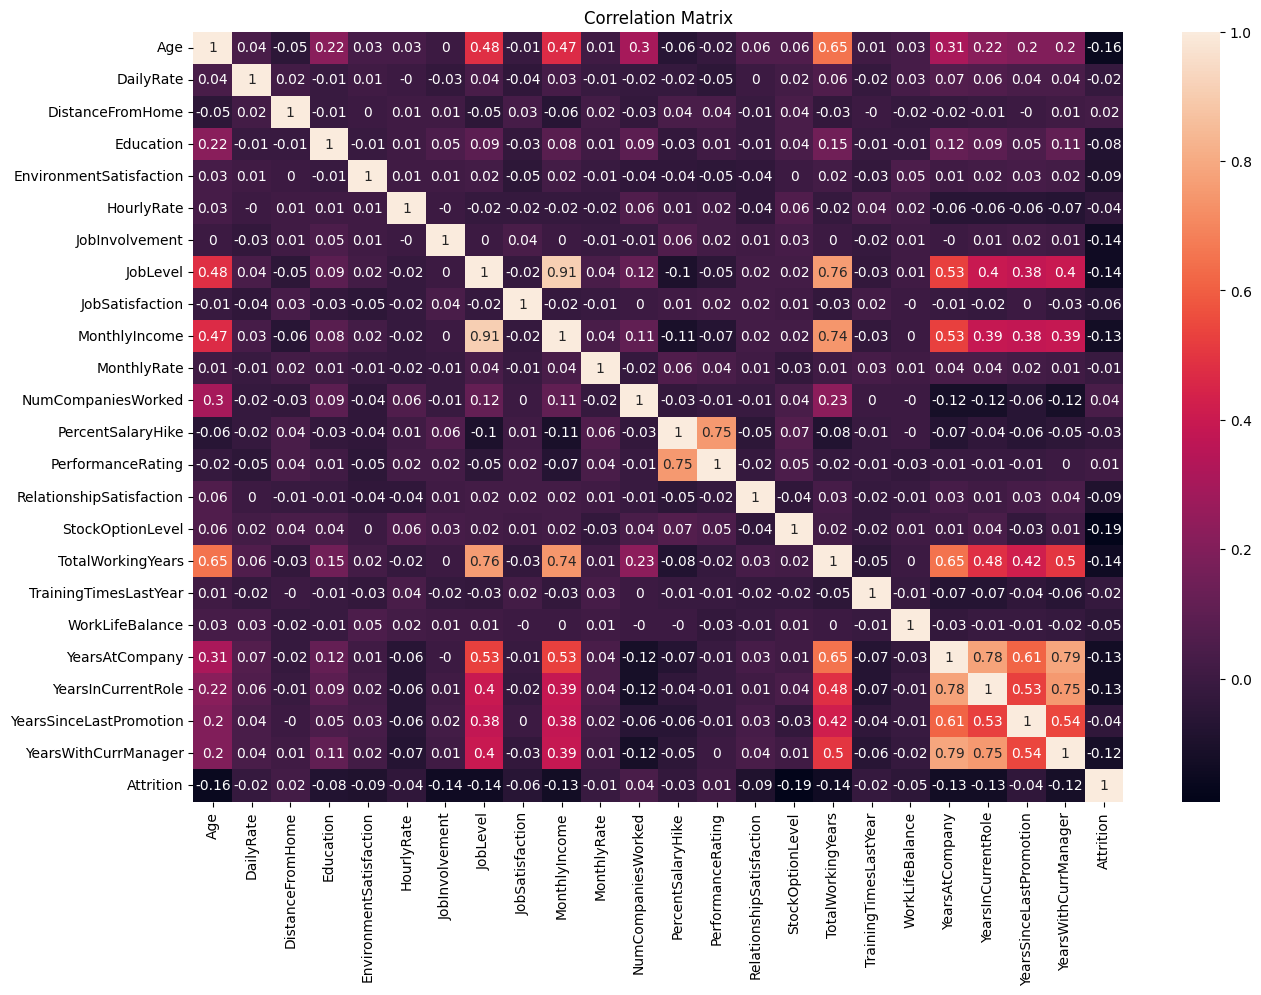

In [ ]:
#Check correlation Matrix to see if there are some features have strong realationship 
CorrelationMatrix = train_data.corr().round(2)
plt.figure(figsize=(15,10))
plt.title('Correlation Matrix')
sns.heatmap(data = CorrelationMatrix, annot = True)
plt.show()

In [ ]:
train_data = train_data.drop(['JobLevel', 'YearsWithCurrManager'], axis=1)

In [ ]:
#split train_data into train_data_object and train_data_int
train_data_object = train_data.select_dtypes(include='object')
train_data_int = train_data.select_dtypes(include='int64').copy()
train_data_int = train_data_int.iloc[:, :-1]

In [ ]:
#Detect Outliers 
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(train_data_int)
x_score = clf.negative_outlier_factor_

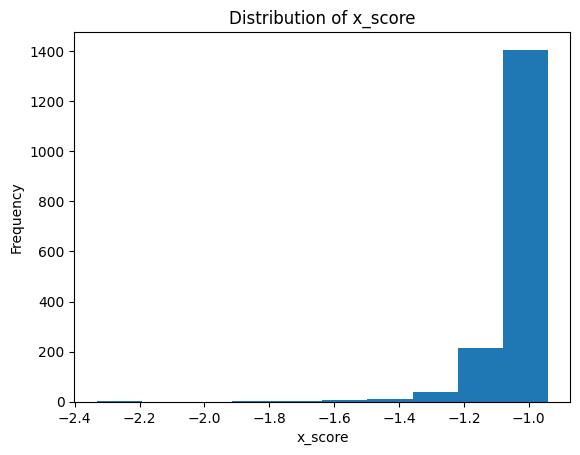

In [ ]:
#Examine the distribution of the x_score by Histogram
plt.hist(x_score, bins=10)  # Adjust the number of bins as needed
plt.xlabel('x_score')
plt.ylabel('Frequency')
plt.title('Distribution of x_score')
plt.show()

In [ ]:
#set threshold to determine outliers 
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score
threshold = -1.6
filtre2 = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre2].index.tolist()
len(outlier_index)

5

In [ ]:
# check outlier's index
outlier_index
index_to_drop = outlier_index + [527]
index_to_drop

[90, 695, 1249, 1253, 1398, 527]

In [ ]:
train_data_int.iloc[index_to_drop]

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
90,27,959,2,2,4,89,3,3,1232,26999,1,19,3,3,0,0,3,2,0,0,0
695,37,621,12,4,3,62,3,3,6928,636,4,15,3,2,1,13,3,4,7,7,7
1249,26,836,24,2,3,87,3,4,1081,17808,1,18,3,3,1,1,2,3,1,0,0
1253,28,504,2,3,2,89,3,3,1081,6409,1,13,3,4,0,1,3,2,1,0,0
1398,44,3921,1,3,4,73,1,4,7336,7439,3,12,3,2,1,24,3,3,20,10,3
527,38,548,1,15,1,72,3,4,2644,6217,7,13,3,1,1,7,2,3,5,2,1


In [ ]:
#Drop outliers 
train_data.drop(index_to_drop, inplace=True)
train_data.reset_index(drop=True, inplace=True)

In [ ]:
train_data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Attrition
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,4,Male,42,3,Laboratory Technician,4,Married,2596,5099,1,Yes,13,3,2,1,10,2,3,10,0,7,0
1,35,Travel_Rarely,921,Sales,8,3,Other,1,Male,46,3,Sales Representative,1,Married,2899,10778,1,No,17,3,4,1,4,3,3,4,2,0,0
2,32,Travel_Rarely,718,Sales,26,3,Marketing,3,Male,80,3,Sales Executive,4,Divorced,4627,16495,0,No,17,3,4,2,4,3,3,3,2,1,0
3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,3,Female,40,3,Healthcare Representative,1,Married,5347,13384,3,No,14,3,3,0,15,1,1,6,0,0,0
4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,2,Female,37,3,Manager,1,Single,19033,19805,1,Yes,13,3,3,0,31,0,3,31,14,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,30,Travel_Rarely,945,Sales,1,3,Life Sciences,4,Female,73,3,Sales Executive,3,Single,8722,14255,1,No,19,3,2,0,10,2,4,10,0,0,0
1667,32,Travel_Rarely,1303,Research & Development,2,3,Life Sciences,1,Male,48,3,Research Scientist,2,Married,3544,15972,4,No,19,3,4,1,10,3,4,4,2,1,0
1668,29,Travel_Frequently,1184,Human Resources,24,3,Human Resources,2,Male,36,2,Human Resources,1,Married,2804,15322,1,Yes,11,3,3,0,1,2,3,1,0,0,1
1669,36,Travel_Rarely,441,Sales,9,2,Marketing,2,Male,48,4,Sales Executive,3,Divorced,5406,4051,1,No,21,4,3,2,10,3,2,10,3,0,0


In [ ]:
# Add features
train_data.insert(4, 'young_and_low_daily_rate', train_data.apply(lambda x: 1 if x['Age'] <= 25 and x['DailyRate'] < 500 else 0, axis=1))

In [ ]:
train_data

,Age,BusinessTravel,DailyRate,Department,young_and_low_daily_rate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Attrition
0,36,Travel_Frequently,599,Research & Development,0,24,3,Medical,4,Male,42,3,Laboratory Technician,4,Married,2596,5099,1,Yes,13,3,2,1,10,2,3,10,0,7,0
1,35,Travel_Rarely,921,Sales,0,8,3,Other,1,Male,46,3,Sales Representative,1,Married,2899,10778,1,No,17,3,4,1,4,3,3,4,2,0,0
2,32,Travel_Rarely,718,Sales,0,26,3,Marketing,3,Male,80,3,Sales Executive,4,Divorced,4627,16495,0,No,17,3,4,2,4,3,3,3,2,1,0
3,38,Travel_Rarely,1488,Research & Development,0,2,3,Medical,3,Female,40,3,Healthcare Representative,1,Married,5347,13384,3,No,14,3,3,0,15,1,1,6,0,0,0
4,50,Travel_Rarely,1017,Research & Development,0,5,4,Medical,2,Female,37,3,Manager,1,Single,19033,19805,1,Yes,13,3,3,0,31,0,3,31,14,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,30,Travel_Rarely,945,Sales,0,1,3,Life Sciences,4,Female,73,3,Sales Executive,3,Single,8722,14255,1,No,19,3,2,0,10,2,4,10,0,0,0
1667,32,Travel_Rarely,1303,Research & Development,0,2,3,Life Sciences,1,Male,48,3,Research Scientist,2,Married,3544,15972,4,No,19,3,4,1,10,3,4,4,2,1,0
1668,29,Travel_Frequently,1184,Human Resources,0,24,3,Human Resources,2,Male,36,2,Human Resources,1,Married,2804,15322,1,Yes,11,3,3,0,1,2,3,1,0,0,1
1669,36,Travel_Rarely,441,Sales,0,9,2,Marketing,2,Male,48,4,Sales Executive,3,Divorced,5406,4051,1,No,21,4,3,2,10,3,2,10,3,0,0


In [ ]:
#Normalize the input features using the sklearn StandardScaler. This will set the mean to 0 and standard deviation to 1.
scaler = StandardScaler()
#split train_data into train_data_object and train_data_int again
train_data_object = train_data.select_dtypes(include='object')
train_data_int = train_data.select_dtypes(include='int64')
train_data_int = train_data_int.iloc[:, :-1]
train_data_int_normalized = pd.DataFrame(scaler.fit_transform(train_data_int), columns=train_data_int.columns)
train_data_labels = train_data.iloc[:,-1:]
train_data_nolabels = pd.concat([train_data_object,train_data_int_normalized],axis=1)
train_data = pd.concat([train_data_nolabels,train_data_labels],axis=1)

In [ ]:
# Save the scaler to a file
file_path = r'C:\Users\ASUS1\Desktop\MSAA\Normalize.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
train_data

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,young_and_low_daily_rate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Attrition
0,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Yes,-0.005486,-0.796271,-0.115505,1.957668,0.069026,1.143387,-1.324784,0.334173,1.102793,-0.798573,-1.364172,-0.634538,-0.556084,-0.383246,-0.697889,0.360514,-0.099446,-0.639347,0.355903,0.542617,-1.158438,1.648132,0
1,Travel_Rarely,Sales,Other,Male,Sales Representative,Married,No,-0.123012,0.080208,-0.115505,-0.088230,0.069026,-1.617595,-1.119068,0.334173,-1.629932,-0.731548,-0.564252,-0.634538,0.612741,-0.383246,1.157596,0.360514,-0.927558,0.232775,0.355903,-0.478265,-0.599860,-0.649627,0
2,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Divorced,No,-0.475590,-0.472355,-0.115505,2.213405,0.069026,0.223060,0.629522,0.334173,1.102793,-0.349311,0.241021,-1.037699,0.612741,-0.383246,1.157596,1.656038,-0.927558,0.232775,0.355903,-0.648412,-0.599860,-0.321376,0
3,Travel_Rarely,Research & Development,Medical,Female,Healthcare Representative,Married,No,0.229566,1.623573,-0.115505,-0.855442,0.069026,0.223060,-1.427642,0.334173,-1.629932,-0.190045,-0.197181,0.171784,-0.263877,-0.383246,0.229854,-0.935010,0.590647,-1.511469,-2.733521,-0.137971,-1.158438,-0.649627,0
4,Travel_Rarely,Research & Development,Medical,Female,Manager,Single,Yes,1.639880,0.341519,-0.115505,-0.471836,1.072006,-0.697268,-1.581930,0.334173,-1.629932,2.837328,0.707254,-0.634538,-0.556084,-0.383246,0.229854,-0.935010,2.798945,-2.383591,0.355903,4.115703,2.751603,0.663378,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,No,-0.710643,0.145536,-0.115505,-0.983311,0.069026,1.143387,0.269518,0.334173,0.191885,0.556512,-0.074496,-0.634538,1.197154,-0.383246,-0.697889,-0.935010,-0.099446,-0.639347,1.900615,0.542617,-1.158438,-0.649627,0
1667,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Married,No,-0.475590,1.120006,-0.115505,-0.855442,0.069026,-1.617595,-1.016210,0.334173,-0.719023,-0.588873,0.167354,0.574945,1.197154,-0.383246,1.157596,0.360514,-0.099446,0.232775,1.900615,-0.478265,-0.599860,-0.321376,0
1668,Travel_Frequently,Human Resources,Human Resources,Male,Human Resources,Married,Yes,-0.828169,0.796090,-0.115505,1.957668,0.069026,-0.697268,-1.633359,-1.204129,-1.629932,-0.752563,0.075797,-0.634538,-1.140496,-0.383246,0.229854,-0.935010,-1.341614,-0.639347,0.355903,-0.988705,-1.158438,-0.649627,1
1669,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Divorced,No,-0.005486,-1.226344,-0.115505,0.039639,-0.933954,-0.697268,-1.016210,1.872476,0.191885,-0.176994,-1.511789,-0.634538,1.781566,2.609293,0.229854,1.656038,-0.099446,0.232775,-1.188809,0.542617,-0.320572,-0.649627,0


In [ ]:
#DATA CLASSIFICATION
#integer data:'id', 'Age',  'DailyRate', 'DistanceFromHome',  'HourlyRate',  'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',  'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'
#categorical integer data:'Education' , 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel','JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel','WorkLifeBalance'
#Dummies:'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'

# Here is the processing for the object variables, transfer them into dummies are the the best way
train_data = pd.get_dummies(train_data, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])
#Here is the processing for the categorical integer data
train_data['Age'] = train_data['Age'].astype('int64')
train_data['Education'] = train_data['Education'].astype('category')
train_data['EnvironmentSatisfaction'] = train_data['EnvironmentSatisfaction'].astype('category')
train_data['JobInvolvement'] = train_data['JobInvolvement'].astype('category')
train_data['JobSatisfaction'] = train_data['JobSatisfaction'].astype('category')
train_data['PerformanceRating'] = train_data['PerformanceRating'].astype('category')
train_data['RelationshipSatisfaction'] = train_data['RelationshipSatisfaction'].astype('category')
train_data['StockOptionLevel'] = train_data['StockOptionLevel'].astype('category')
train_data['WorkLifeBalance'] = train_data['WorkLifeBalance'].astype('category')

In [ ]:
train_data.shape

(1671, 51)

In [ ]:
train_data

,Age,DailyRate,young_and_low_daily_rate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,-0.796271,-0.115505,1.957668,0.069026,1.143387,-1.324784,0.334173,1.102793,-0.798573,-1.364172,-0.634538,-0.556084,-0.383246,-0.697889,0.360514,-0.099446,-0.639347,0.355903,0.542617,-1.158438,1.648132,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,0,0.080208,-0.115505,-0.088230,0.069026,-1.617595,-1.119068,0.334173,-1.629932,-0.731548,-0.564252,-0.634538,0.612741,-0.383246,1.157596,0.360514,-0.927558,0.232775,0.355903,-0.478265,-0.599860,-0.649627,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0
2,0,-0.472355,-0.115505,2.213405,0.069026,0.223060,0.629522,0.334173,1.102793,-0.349311,0.241021,-1.037699,0.612741,-0.383246,1.157596,1.656038,-0.927558,0.232775,0.355903,-0.648412,-0.599860,-0.321376,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
3,0,1.623573,-0.115505,-0.855442,0.069026,0.223060,-1.427642,0.334173,-1.629932,-0.190045,-0.197181,0.171784,-0.263877,-0.383246,0.229854,-0.935010,0.590647,-1.511469,-2.733521,-0.137971,-1.158438,-0.649627,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
4,1,0.341519,-0.115505,-0.471836,1.072006,-0.697268,-1.581930,0.334173,-1.629932,2.837328,0.707254,-0.634538,-0.556084,-0.383246,0.229854,-0.935010,2.798945,-2.383591,0.355903,4.115703,2.751603,0.663378,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,0,0.145536,-0.115505,-0.983311,0.069026,1.143387,0.269518,0.334173,0.191885,0.556512,-0.074496,-0.634538,1.197154,-0.383246,-0.697889,-0.935010,-0.099446,-0.639347,1.900615,0.542617,-1.158438,-0.649627,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1667,0,1.120006,-0.115505,-0.855442,0.069026,-1.617595,-1.016210,0.334173,-0.719023,-0.588873,0.167354,0.574945,1.197154,-0.383246,1.157596,0.360514,-0.099446,0.232775,1.900615,-0.478265,-0.599860,-0.321376,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
1668,0,0.796090,-0.115505,1.957668,0.069026,-0.697268,-1.633359,-1.204129,-1.629932,-0.752563,0.075797,-0.634538,-1.140496,-0.383246,0.229854,-0.935010,-1.341614,-0.639347,0.355903,-0.988705,-1.158438,-0.649627,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1669,0,-1.226344,-0.115505,0.039639,-0.933954,-0.697268,-1.016210,1.872476,0.191885,-0.176994,-1.511789,-0.634538,1.781566,2.609293,0.229854,1.656038,-0.099446,0.232775,-1.188809,0.542617,-0.320572,-0.649627,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0


In [ ]:
#show figures
#plt.figure(figsize=(20,20))
#train_data.hist(figsize=(20,20))
#plt.tight_layout

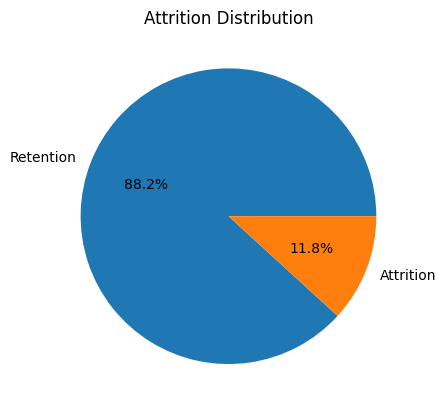

In [ ]:
#DATA VISUALIZATION
attrition_counts = train_data['Attrition'].value_counts()
labels = ['Retention', 'Attrition']
plt.pie(attrition_counts, labels=labels, autopct='%1.1f%%')
plt.title('Attrition Distribution')
plt.show()

In [ ]:
train_data.columns

Index(['Age', 'DailyRate', 'young_and_low_daily_rate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'Attrition', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resourc

In [ ]:
# This chart shows the percentage of employees who have left (attrition) the company versus those who have not (retention). 
# In this case, we can see that 11.9% of employees in the dataset have left the company, while the remaining 88.1% are still employed.
# This information can be useful for HR managers and company leaders as they make decisions about employee retention and workforce planning. 
# Compare with company's attrition rate with the average attrition rate in the same industry, HR can judge their strategy for employing
# For example, if a company has a high attrition rate, they may need to investigate the reasons why employees are leaving 
# and take steps to address these issues in order to retain their workforce. 
# On the other hand, if a company has a low attrition rate, they may want to focus on strategies to attract 
# and retain top talent in a competitive job market

In [ ]:
list_to_pop = ['Attrition']
for col in list_to_pop:
  train_data_labels = train_data.pop(col)
train_data_labels

0       0
1       0
2       0
3       0
4       1
       ..
1666    0
1667    0
1668    1
1669    0
1670    0
Name: Attrition, Length: 1671, dtype: int64

# **the dataset into train0.7,validation0.2 and test 0.1**

In [ ]:
train, X_remaining, train_labels, y_remaining = train_test_split(train_data, train_data_labels, test_size=0.35, random_state=42)

In [ ]:
validation, test, validation_labels, test_labels = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

In [ ]:
#train = train_data[:1341]
#validation = train_data[1341:1510]
#test = train_data[1510:]

In [ ]:
#train_labels = train_data_labels.iloc[:1341]
#validation_labels = train_data_labels.iloc[1341:1510]
#test_labels = train_data_labels.iloc[1510:]

In [ ]:
# Calculate class weights
counts = np.bincount(train_data_labels)
total_samples = len(train_data_labels)
class_weights = {0: total_samples / (2 * counts[0]), 1: total_samples / (2 * counts[1])}

In [ ]:
class_weights 

{0: 0.5668249660786974, 1: 4.241116751269035}


# **Build the initial DL model with 1 hidden layer**

In [ ]:
tf.keras.backend.clear_session()
#This is for model clearing if you run the sequential for a lot of times

In [ ]:
# Build baseline model with Sequential API

baseline_model = keras.Sequential()
baseline_model.add(keras.layers.Flatten(input_shape=(50,)))
baseline_model.add(keras.layers.Dense(units=100, activation='relu'))
baseline_model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 100)               5100      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,201
Trainable params: 5,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# After the model is created, we must call its compile() method to specify the loss function and the optimizer to use. 
# Optionally, you can also specify a list of extra metrics to compute during training and evaluation:
baseline_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.002),
              loss='binary_crossentropy',
              metrics=['AUC','accuracy'])

In [ ]:
# Number of epochs
NUM_EPOCHS = 40

# Early stopping set after 5 epochs
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Calculate class weights
counts = np.bincount(train_data_labels)
total_samples = len(train_data_labels)
class_weights = {0: total_samples / (2 * counts[0]), 1: total_samples / (2 * counts[1])}

# Train model with class weights 
baseline_model.fit(train, train_labels, epochs=NUM_EPOCHS, validation_data=(validation, validation_labels), 
                   callbacks=[stop_early], verbose=2,class_weight=class_weights)

Epoch 1/40
34/34 - 2s - loss: 0.6282 - auc: 0.7355 - accuracy: 0.6243 - val_loss: 0.6200 - val_auc: 0.7961 - val_accuracy: 0.6370 - 2s/epoch - 56ms/step
Epoch 2/40
34/34 - 0s - loss: 0.5300 - auc: 0.8362 - accuracy: 0.7118 - val_loss: 0.5170 - val_auc: 0.8292 - val_accuracy: 0.7329 - 104ms/epoch - 3ms/step
Epoch 3/40
34/34 - 0s - loss: 0.4875 - auc: 0.8599 - accuracy: 0.7643 - val_loss: 0.5294 - val_auc: 0.8361 - val_accuracy: 0.7123 - 116ms/epoch - 3ms/step
Epoch 4/40
34/34 - 0s - loss: 0.4616 - auc: 0.8748 - accuracy: 0.7680 - val_loss: 0.4554 - val_auc: 0.8453 - val_accuracy: 0.7671 - 116ms/epoch - 3ms/step
Epoch 5/40
34/34 - 0s - loss: 0.4411 - auc: 0.8845 - accuracy: 0.7937 - val_loss: 0.5840 - val_auc: 0.8429 - val_accuracy: 0.6884 - 108ms/epoch - 3ms/step
Epoch 6/40
34/34 - 0s - loss: 0.4143 - auc: 0.9034 - accuracy: 0.8066 - val_loss: 0.5149 - val_auc: 0.8442 - val_accuracy: 0.7192 - 116ms/epoch - 3ms/step
Epoch 7/40
34/34 - 0s - loss: 0.3905 - auc: 0.9167 - accuracy: 0.7965 - 

**performance on test data**

In [ ]:
baseline_model.evaluate(test,test_labels)

10/10 [==============================] - 0s 3ms/step - loss: 0.4053 - auc: 0.8414 - accuracy: 0.8430


[0.4053405523300171, 0.8414420485496521, 0.8430033922195435]

In [ ]:
#precision and F1 score for model
# accuracy: (tp + tn) / (p + n)
y_predict = baseline_model.predict(test)
y_predict_discrete = (y_predict >= 0.5).astype(int)[:, 0]
accuracy = accuracy_score(test_labels, y_predict_discrete)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, y_predict_discrete)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, y_predict_discrete)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, y_predict_discrete)
print('F1 score: %f' % f1)

10/10 [==============================] - 0s 2ms/step
Accuracy: 0.843003
Precision: 0.354839
Recall: 0.785714
F1 score: 0.488889


In [ ]:
cm = confusion_matrix(test_labels,y_predict_discrete)
print(cm)

[[225  40]
 [  6  22]]


# **Tune hyperparameters**

In [ ]:
def build_model_wrapper(hp):
    """
    Wrapper function that builds model with class weights.
    
    Parameters
    ----------
    hp : HyperParameter object
        Configures hyperparameters to tune.
        
    Returns
    -------
    model : keras model
        Compiled model with hyperparameters to tune.
    """
    class_weights = {0: 0.5667796610169491, 1: 4.243654822335025}    # Example class weights dictionary

    def build_model(hp):
        """
        Builds model and sets up hyperparameter space to search.
        
        Parameters
        ----------
        hp : HyperParameter object
            Configures hyperparameters to tune.
            
        Returns
        -------
        model : keras model
            Compiled model with hyperparameters to tune.
        """
        # Initialize sequential API and start building model.
        model = keras.Sequential()
        model.add(keras.layers.Flatten(input_shape=(50,)))
        
        # Tune the number of hidden layers and units in each.
        # Number of hidden layers: 1 - 4
        # Number of Units: 4 - 32 with stepsize of 4
        for i in range(1, hp.Int("num_layers", 2, 4)):
            model.add(
                keras.layers.Dense(
                    units=hp.Int("units_" + str(i), min_value=4, max_value=16, step=4),
                    activation="relu")
                )
            
            # Tune dropout layer with values from 0.1 - 0.3.
            model.add(keras.layers.Dropout(hp.Float("dropout_" + str(i), 0.1, 0.3, step=0.05)))
        
        # Add output layer.
        model.add(keras.layers.Dense(units=1, activation="sigmoid"))
        
        # Tune learning rate for Adam optimizer with values from 0.01, 0.001, or 0.0001
        hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
        
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                      loss='binary_crossentropy',
                      metrics=["AUC", "accuracy"])
        
        return model
    
    return build_model(hp)

# Instantiate the tuner with the wrapper function
tuner = kt.Hyperband(build_model_wrapper,
                     objective=kt.Objective("accuracy", "max"),
                     max_epochs=10,
                     factor=3,
                     hyperband_iterations=1,
                     directory="kt_dir",
                     project_name="kt_hyperband",
                     overwrite=True)

tuner.search(train, train_labels, epochs=NUM_EPOCHS, validation_data=(validation, validation_labels),
             callbacks=[stop_early], verbose=0)



In [ ]:
# Get the optimal hyperparameters from the results
best_hps=tuner.get_best_hyperparameters()[0]
hp_model = tuner.hypermodel.build(best_hps)
hp_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 12)                612       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hp_model.fit(train, train_labels, epochs=NUM_EPOCHS, validation_data=(validation, validation_labels), 
                   callbacks=[stop_early], verbose=2,class_weight = class_weights)

Epoch 1/40
34/34 - 2s - loss: 0.6876 - auc: 0.6466 - accuracy: 0.5368 - val_loss: 0.5765 - val_auc: 0.7683 - val_accuracy: 0.7089 - 2s/epoch - 46ms/step
Epoch 2/40
34/34 - 0s - loss: 0.5936 - auc: 0.7559 - accuracy: 0.7155 - val_loss: 0.6076 - val_auc: 0.8258 - val_accuracy: 0.6712 - 206ms/epoch - 6ms/step
Epoch 3/40
34/34 - 0s - loss: 0.5464 - auc: 0.8059 - accuracy: 0.7643 - val_loss: 0.5706 - val_auc: 0.8275 - val_accuracy: 0.7226 - 147ms/epoch - 4ms/step
Epoch 4/40
34/34 - 0s - loss: 0.5062 - auc: 0.8407 - accuracy: 0.7385 - val_loss: 0.4719 - val_auc: 0.8312 - val_accuracy: 0.7945 - 195ms/epoch - 6ms/step
Epoch 5/40
34/34 - 0s - loss: 0.5149 - auc: 0.8296 - accuracy: 0.7947 - val_loss: 0.5434 - val_auc: 0.8397 - val_accuracy: 0.7500 - 176ms/epoch - 5ms/step
Epoch 6/40
34/34 - 0s - loss: 0.4905 - auc: 0.8546 - accuracy: 0.7680 - val_loss: 0.5263 - val_auc: 0.8364 - val_accuracy: 0.7432 - 147ms/epoch - 4ms/step
Epoch 7/40
34/34 - 0s - loss: 0.4987 - auc: 0.8494 - accuracy: 0.7974 - 

In [ ]:
#precision and F1 score for model
# accuracy: (tp + tn) / (p + n)
y_predict = hp_model.predict(test)
y_predict_discrete = (y_predict >= 0.5).astype(int)[:, 0]
accuracy = accuracy_score(test_labels, y_predict_discrete)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, y_predict_discrete)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, y_predict_discrete)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, y_predict_discrete)
print('F1 score: %f' % f1)

10/10 [==============================] - 0s 2ms/step
Accuracy: 0.798635
Precision: 0.287671
Recall: 0.750000
F1 score: 0.415842


[[213  52]
 [  7  21]]


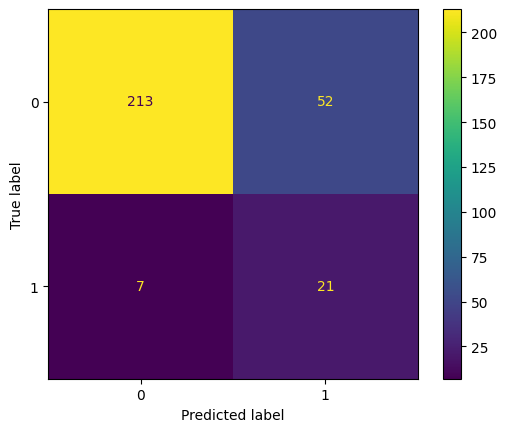

In [ ]:
cm = confusion_matrix(test_labels,y_predict_discrete)
print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:

def calculate_feature_importance(model, X, y, metric=accuracy_score, num_permutations=10):
    baseline_predictions = model.predict(X)
    baseline_predict_discrete = (baseline_predictions >= 0.52).astype(int)[:, 0]
    baseline_score = metric(y, baseline_predict_discrete)

    feature_importance_scores = np.zeros(X.shape[1])
    num_instances = X.shape[0]

    for _ in range(num_permutations):
        permuted_X = X.copy()

        for feature_idx in range(X.shape[1]):
            permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])

            permuted_predictions = model.predict(permuted_X)
            permuted_predictions_discrete =  (permuted_predictions >= 0.52).astype(int)[:, 0]
            permuted_score = metric(y, permuted_predictions_discrete)

            feature_importance_scores[feature_idx] += (baseline_score - permuted_score) / num_instances

    return feature_importance_scores

In [ ]:
# Calculate feature importance scores
feature_importance = calculate_feature_importance(hp_model, train, train_labels)

 1/34 [..............................] - ETA: 0s

<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 2ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 2ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 2ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 2ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


 1/34 [..............................] - ETA: 0s

<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


 1/34 [..............................] - ETA: 0s

<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 2ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 2ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 2ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 2ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


 1/34 [..............................] - ETA: 0s

<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


 1/34 [..............................] - ETA: 0s

<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


 1/34 [..............................] - ETA: 0s

<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 2ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 2ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 2ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


 1/34 [..............................] - ETA: 0s

<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


 1/34 [..............................] - ETA: 0s

<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


 1/34 [..............................] - ETA: 0s

<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 2ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])
<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 2ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 2ms/step


<ipython-input-136-aa5b981815ce>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  permuted_X.iloc[:, feature_idx] = np.random.permutation(X.iloc[:, feature_idx])


34/34 [==============================] - 0s 1ms/step


In [ ]:
feature_importance = np.array(feature_importance)

np.set_printoptions(suppress=True)
print(feature_importance)

[0.00006105 0.00010175 0.00011531 0.00013651 0.00015601 0.0002603
 0.00026369 0.00041801 0.00043412 0.00041377 0.00041377 0.00045362
 0.00046973 0.00051467 0.00057063 0.00060879 0.00055876 0.00059522
 0.00060455 0.00065796 0.00064864 0.00066814 0.00068934 0.00070969
 0.00071986 0.00073088 0.00073767 0.00072071 0.0007224  0.00072919
 0.00073173 0.00073767 0.00074275 0.00074191 0.00074614 0.00074699
 0.00075547 0.00075886 0.00074954 0.00074954 0.00081567 0.00083263
 0.00083263 0.00083941 0.00085213 0.00091233 0.00089537 0.00091488
 0.0009454  0.00099288]


In [ ]:
logisticmodel = LogisticRegression(class_weight='balanced')

In [ ]:
logisticmodel.fit(train, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [ ]:
# Get the coefficients of the logistic regression model
coefficients = logisticmodel.coef_[0]

# Get the names of the features
feature_names = train.columns

# Create a dictionary to store feature names and their corresponding coefficients
feature_importance = dict(zip(feature_names, coefficients))

# Sort the feature_importance dictionary by the absolute values of the coefficients
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

In [ ]:
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

BusinessTravel_Non-Travel: -1.2067166064140458
JobRole_Manufacturing Director: -1.0675810982641545
BusinessTravel_Travel_Frequently: 0.878501386254431
JobRole_Sales Representative: 0.8410661121155708
OverTime_No: -0.6001705533420263
OverTime_Yes: 0.5935213220478719
EducationField_Marketing: 0.5131407713557752
EducationField_Human Resources: 0.5104591337765186
MaritalStatus_Divorced: -0.47255165169043156
MaritalStatus_Single: 0.44711190411777135
StockOptionLevel: -0.4292005776404467
JobRole_Laboratory Technician: 0.4261590462098446
NumCompaniesWorked: 0.4007596057260139
JobRole_Research Director: -0.39528682293499284
JobRole_Human Resources: 0.36402132733722004
JobInvolvement: -0.3638473431336381
PercentSalaryHike: -0.3377377846416851
EducationField_Medical: -0.3364286856391184
PerformanceRating: 0.32370421393214704
BusinessTravel_Travel_Rarely: 0.32156598886545523
YearsInCurrentRole: -0.3087388158655494
TotalWorkingYears: -0.29919555986099733
RelationshipSatisfaction: -0.29841655349563

In [ ]:
y_predict = logisticmodel.predict(test)

In [ ]:
accuracy = accuracy_score(test_labels, y_predict)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, y_predict)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, y_predict)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, y_predict)
print('F1 score: %f' % f1)

Accuracy: 0.764505
Precision: 0.264368
Recall: 0.821429
F1 score: 0.400000


[[201  64]
 [  5  23]]


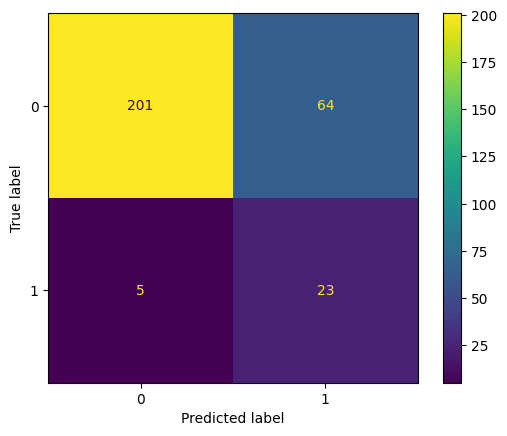

In [ ]:
cm = confusion_matrix(test_labels,y_predict)
print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
# Save the model to a file
filename = 'hp_model.sav'
pickle.dump(hp_model, open(filename, 'wb'))
filename = 'baseline_model.sav'
pickle.dump(baseline_model, open(filename, 'wb'))
filename = 'logisticmodel.sav'
pickle.dump(logisticmodel, open(filename, 'wb'))

In [ ]:
# Load the model from the file
loaded_model = pickle.load(open('logisticmodel.sav', 'rb'))

# Use the loaded model for predictions
predictions = loaded_model.predict(test)
print(predictions)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1]


In [ ]:
#drive.mount('/content/drive')

In [ ]:
# Load the saved scaler from the file
file_path = r'C:\Users\ASUS1\Desktop\MSAA\Normalize.pkl'
with open(file_path, 'rb') as f:
    scaler = pickle.load(f)

# Transform the test data using the loaded scaler
#X_test_normalized = scaler.transform(X_test)  

# Use the normalized test data for prediction with your trained model
#predictions = model.predict(X_test_normalized)
